In [1]:
import cv2
import tifffile as tifi
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def obtain_images(img, num = 3):
    img_pad = cv2.copyMakeBorder(img, 1000, 1000, 1000, 1000, cv2.BORDER_CONSTANT, value=[255,255,255])
    gray = cv2.cvtColor(img_pad, cv2.COLOR_BGR2HSV)[:,:,2]
    _, binary_mask = cv2.threshold(gray, 253, 255, cv2.THRESH_BINARY)
    binary_mask_inv = cv2.bitwise_not(binary_mask)
    contours, _ = cv2.findContours(binary_mask_inv, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    #obtain the top 3 biggest contours
    copy = img_pad.copy()
    contours = sorted(contours, key=cv2.contourArea, reverse=True)[:num]

    cropped = []
    for i in range(len(contours)):
        x,y,w,h = cv2.boundingRect(contours[i])
        crop = img_pad[y:y+h, x:x+w]
        cropped.append(crop)
    
    return cropped



In [3]:
images_names = ["B22-25-HP.tiff", "B22-31-HP.tiff", "B22-35-HP.tiff"]

In [4]:
all_crop = []
for image_name in images_names:
    img = tifi.imread(image_name)
    img_res = cv2.resize(img, (int(img.shape[1]*0.1),int(img.shape[0]*0.1)))
    all_crop.append(obtain_images(img_res))
    print('ok')
        


ok
ok
ok


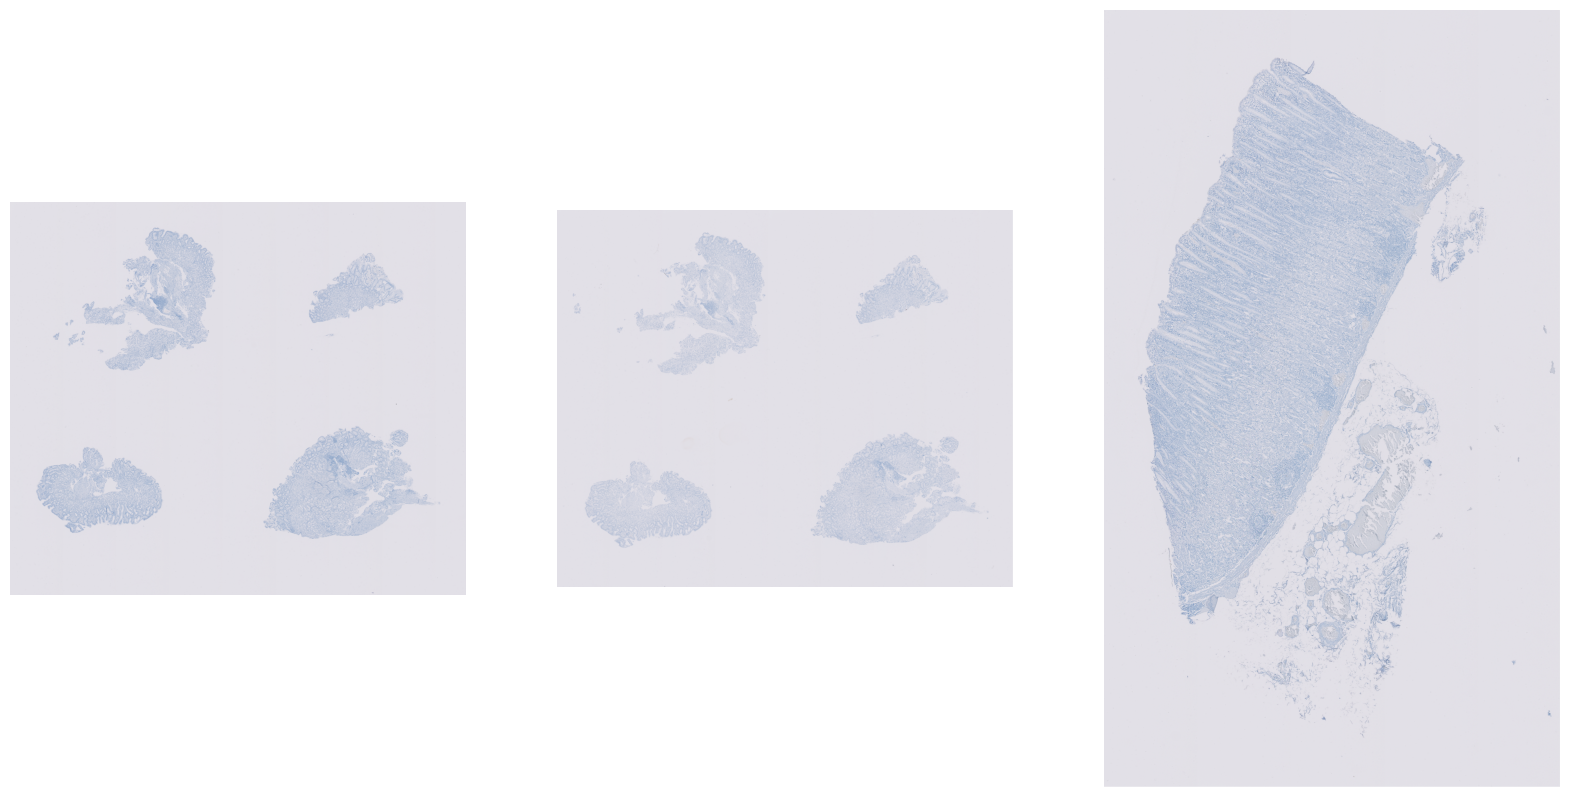

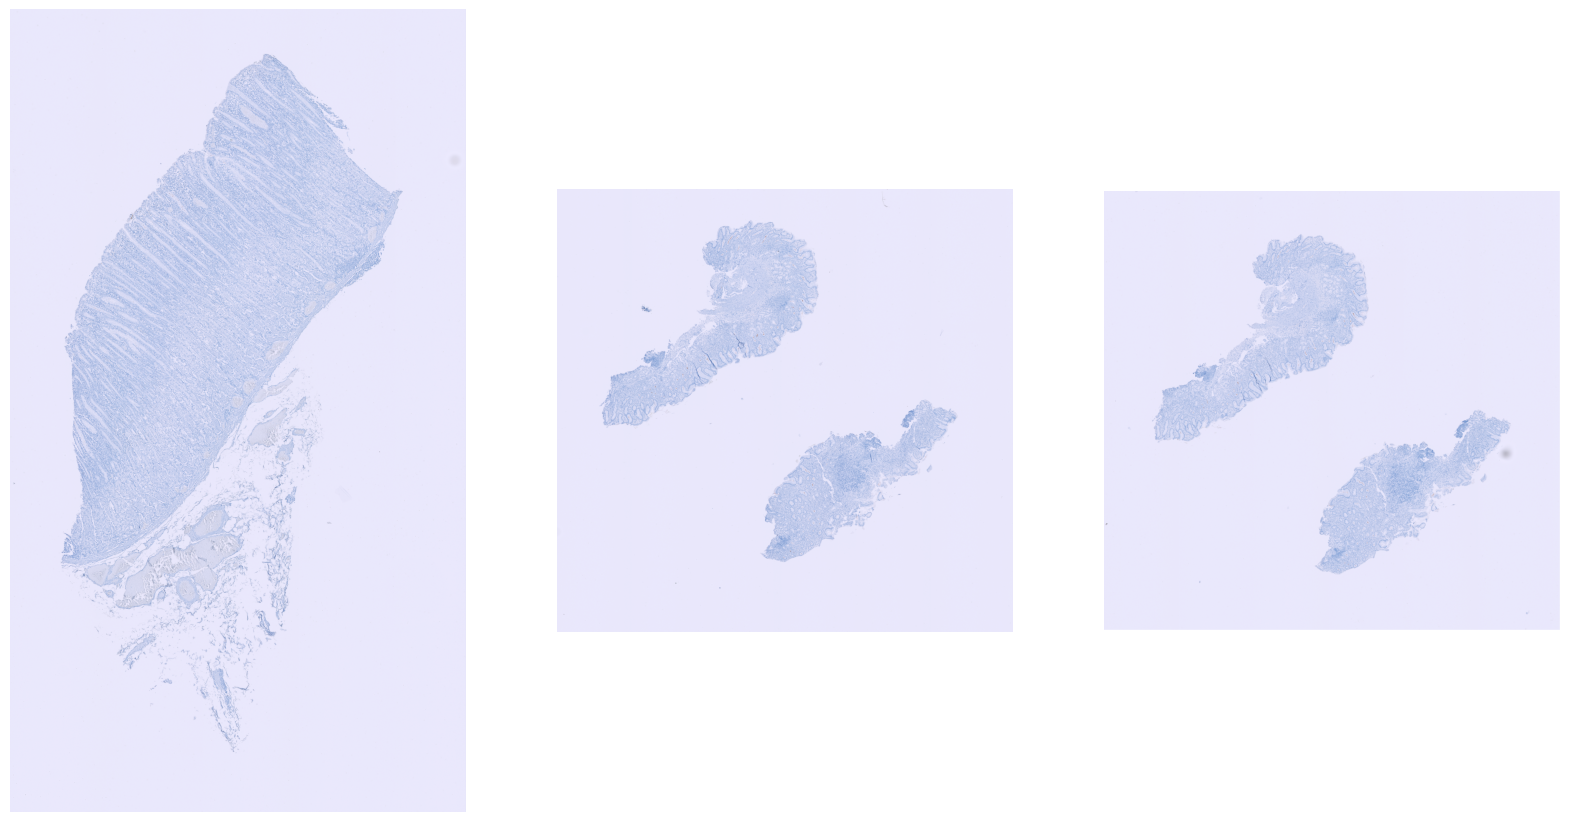

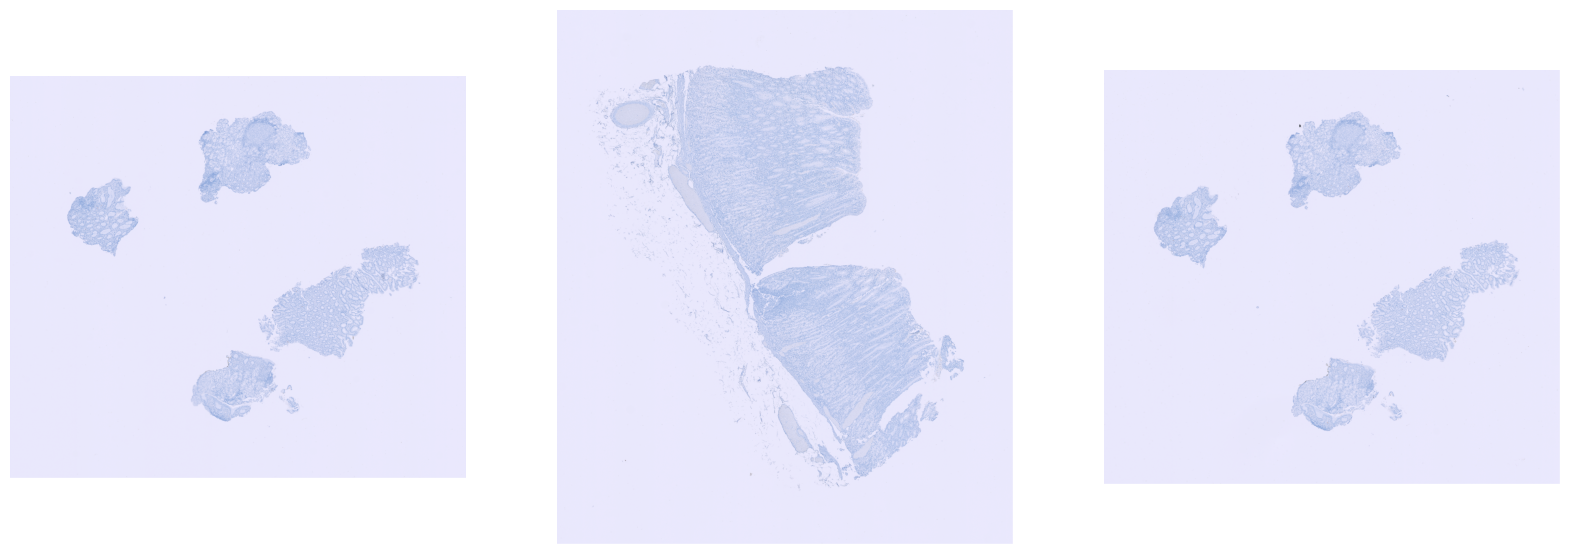

In [5]:
for c in all_crop:
    fig, ax = plt.subplots(1, len(c), figsize=(20,20))
    for i in range(len(c)):
        ax[i].imshow(c[i])
        ax[i].axis('off')
    plt.show()

In [6]:
sample = all_crop[0][0]

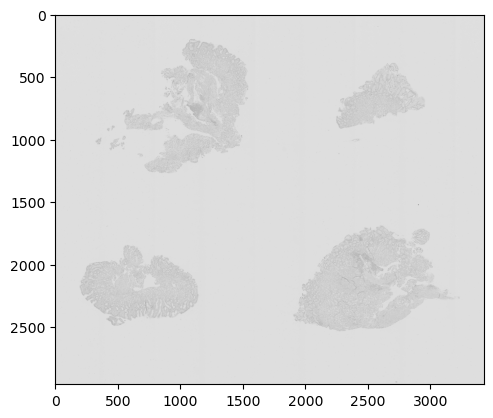

In [7]:
gray = cv2.cvtColor(sample, cv2.COLOR_BGR2HSV)[:,:,2]
plt.imshow(gray, cmap='gray')

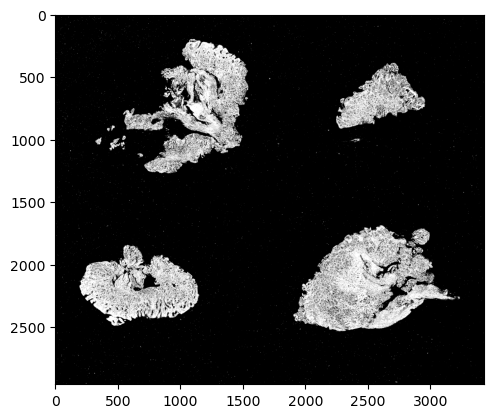

In [8]:
_, binary_mask = cv2.threshold(gray, 225, 255, cv2.THRESH_BINARY)
binary_mask_inv = cv2.bitwise_not(binary_mask)
plt.imshow(binary_mask_inv, cmap='gray')

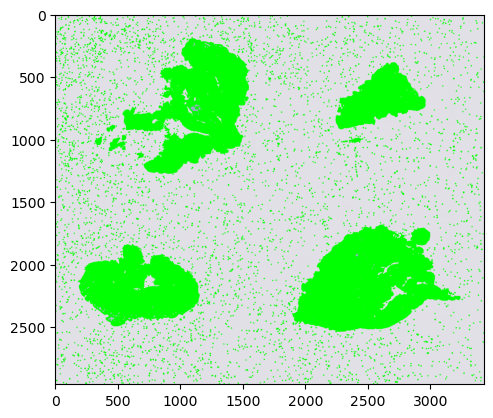

In [9]:
# find contours

copy = sample.copy()
contours, _ = cv2.findContours(binary_mask_inv, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

#draw contours

cv2.drawContours(copy, contours, -1, (0,255,0), 10)
plt.imshow(copy)



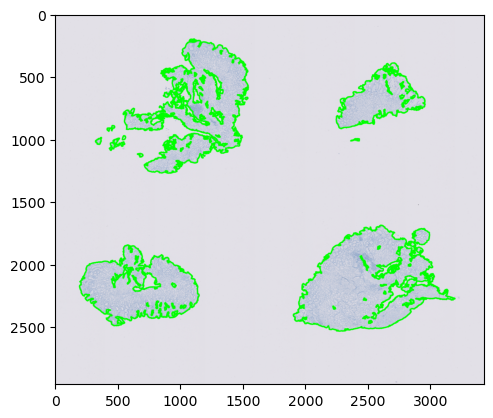

In [10]:
# filter by a mininum area

copy = sample.copy()
min_area = 225
filtered = [c for c in contours if cv2.contourArea(c) > min_area]
cv2.drawContours(copy, filtered, -1, (0,255,0), 10)
plt.imshow(copy)


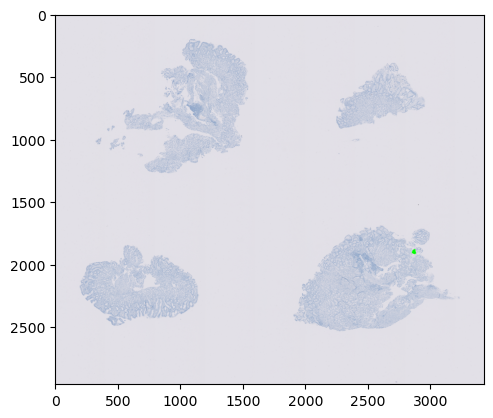

In [71]:
#draw only first contour of filtered
prueba = copy.copy()
to_draw = filtered[0]

cv2.drawContours(prueba, to_draw, -1, (0,255,0), 10)
plt.imshow(prueba)



In [25]:
print(filtered[0][0])

[[2874 1883]]


In [55]:
print(filtered[0][0], filtered[0][len(filtered[0])//2])

[[2874 1883]] [[2858 1906]]


In [129]:
window_size = 256
crops = []

#print(x_prior, y_prior)
for contour in filtered:
    c = []
    for i in range(0, len(contour), 100):
        x, y = contour[i][0]
        crop = sample[y:y+window_size, x:x+window_size]
        c.append(crop)
    crops.append(c)


In [120]:
len(filtered)

137

In [143]:
#get the element with max length in crops
max_len = max([len(c) for c in crops])
max_len
#get this element
max_crops = [c for c in crops if len(c) == max_len][0]

In [144]:
fig, ax = plt.subplots(1, len(max_crops), figsize=(20,20))
for i in range(len(max_crops)):
    ax[i].imshow(max_crops[i])
    ax[i].axis('off')
plt.show()

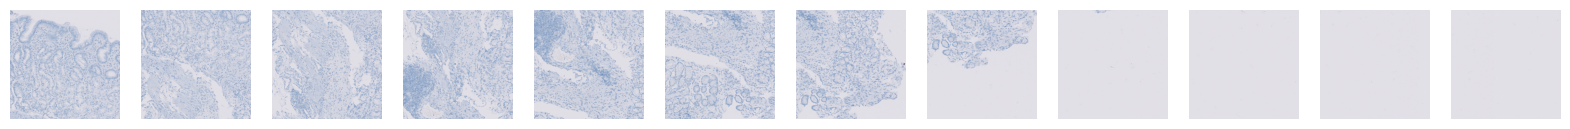

In [123]:
#get the element with max lenght in crops
max_len = max([len(c) for c in crops])
#get the element
max_len_crop = [c for c in crops if len(c) == max_len][0]

#plot max_len_crop images
fig, ax = plt.subplots(1, len(max_len_crop), figsize=(20,20))
for i in range(len(max_len_crop)):
    ax[i].imshow(max_len_crop[i])
    ax[i].axis('off')
plt.show()

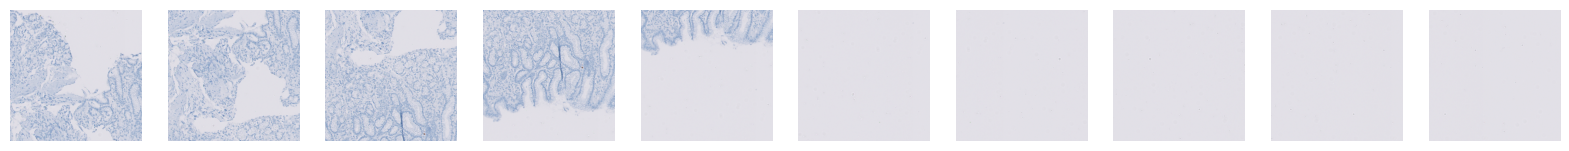

In [83]:
#plot crops
fig, ax = plt.subplots(1, len(crops), figsize=(20,20))
for i in range(len(crops)):
    ax[i].imshow(crops[i])
    ax[i].axis('off')
plt.show()

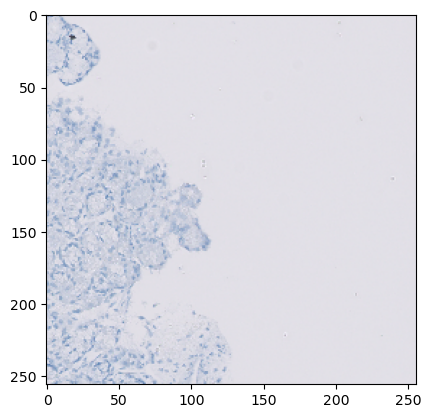

In [75]:
#plot cropped img
cropped_img = crops[0]
plt.imshow(cropped_img)